# Data Preprocessing Notebook

In [2]:
#Importing dependencies 
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas_datareader as web
import datetime
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

In [68]:
df = web.DataReader('SPY', 'yahoo', start='1998-01-30', end='2018-12-24')

In [65]:
df = df.sort_values(by='Date').reset_index()

In [66]:
ti = TechIndicators(key='4MI00I6LJ8Y6T2CH')
ts = TimeSeries(key='4MI00I6LJ8Y6T2CH')

In [67]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1998-01-29,99.562500,97.562500,97.843697,98.250000,8007700.0,67.215103
1,1998-01-30,98.968697,98.000000,98.781197,98.312500,3649100.0,67.257866
2,1998-02-02,100.500000,99.750000,99.906197,99.937500,5756300.0,68.369568
3,1998-02-03,100.812500,99.718697,100.000000,100.687500,2759600.0,68.882652
4,1998-02-04,101.156197,99.937500,100.281197,100.562500,3374000.0,68.797134
5,1998-02-05,101.593697,100.031197,101.312500,100.500000,5076200.0,68.754379
6,1998-02-06,101.625000,100.687500,101.000000,101.625000,5701200.0,69.524017
7,1998-02-09,101.750000,100.718697,101.718697,101.281197,2322200.0,69.288826
8,1998-02-10,102.468697,101.187500,101.437500,102.250000,3660400.0,69.951599
9,1998-02-11,102.343697,101.703102,102.093697,102.156197,4073200.0,69.887421


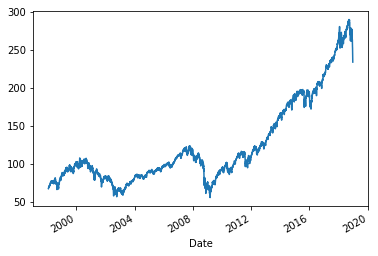

In [69]:
df['Adj Close'].plot()

# Exponential Moving Average

In [12]:
df['5-DayEMA'] = df['Adj Close'].ewm(span=5).mean()
df['20-DayEMA'] = df['Adj Close'].ewm(span=20).mean()

In [59]:
df.to_csv('df.csv')

# Stochastic Oscillator

In [16]:
stock, meta_stock = ti.get_stoch(symbol='SPY')

In [24]:
stochastic = pd.DataFrame(stock)
stochastic = stochastic.T

In [26]:
stochastic.to_csv('stochastic.csv')

# MACD

In [28]:
stock2 , meta_stock2 = ti.get_macd(symbol='SPY')

In [33]:
macd = pd.DataFrame(stock2)
macd = macd.T

In [36]:
macd.to_csv('macd.csv')

# CCI

In [38]:
stock3, meta_stock3 = ti.get_cci(symbol='SPY')

In [41]:
cci = pd.DataFrame(stock3)
cci = cci.T

In [44]:
cci.to_csv('cci.csv')

# OBV

In [45]:
stock4, meta_stock4 = ti.get_obv(symbol='SPY')

In [49]:
obv = pd.DataFrame(stock4)
obv = obv.T

In [52]:
obv.to_csv('obv.csv')

# Bbands

In [54]:
stock5, meta_stock5 = ti.get_bbands(symbol='SPY')

In [55]:
bbands = pd.DataFrame(stock5)
bbands = bbands.T

In [58]:
bbands.to_csv('bbands.csv')